Import potrzebnych bibliotek


In [16]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import sklearn
import sklearn.datasets
import sklearn.model_selection
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Ładujemy dane i wyswietlamy je w tabelce z naglowkami (cechami)

In [28]:
data = pd.read_csv("../Datasets/breast-cancer.csv")
data = data.drop('id',axis=1)
data.info()
data.head()

# drop the id column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Wyświetlamy problem ktory chcemy rozpoznac ale liczymy ilosc danych

In [7]:
data["diagnosis"].unique()
data["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

Spróbujmy wziąć pod uwagę tylko te cechy, które mają największe korelacje z diagnozą.

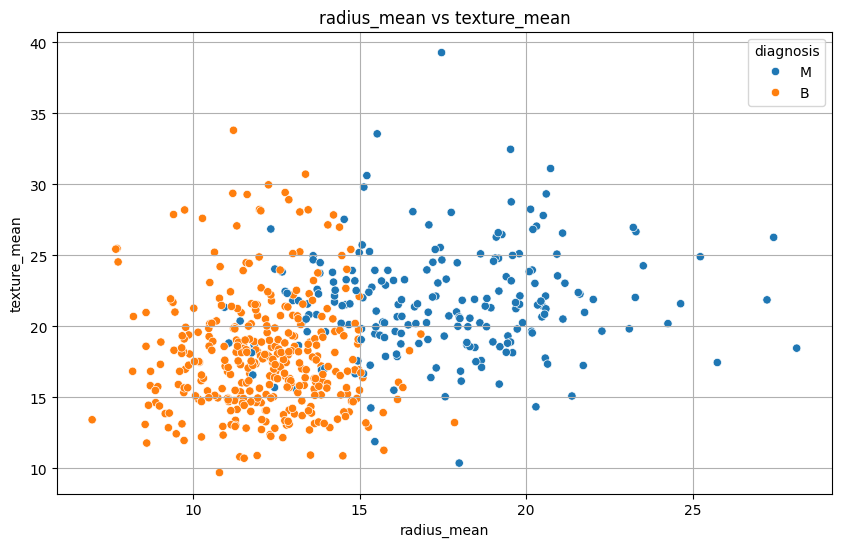

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='radius_mean',y='texture_mean',data=data,hue='diagnosis')
plt.title('radius_mean vs texture_mean')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.grid(True)
plt.show()


Zobaczmy jak wyglada rozklad probek

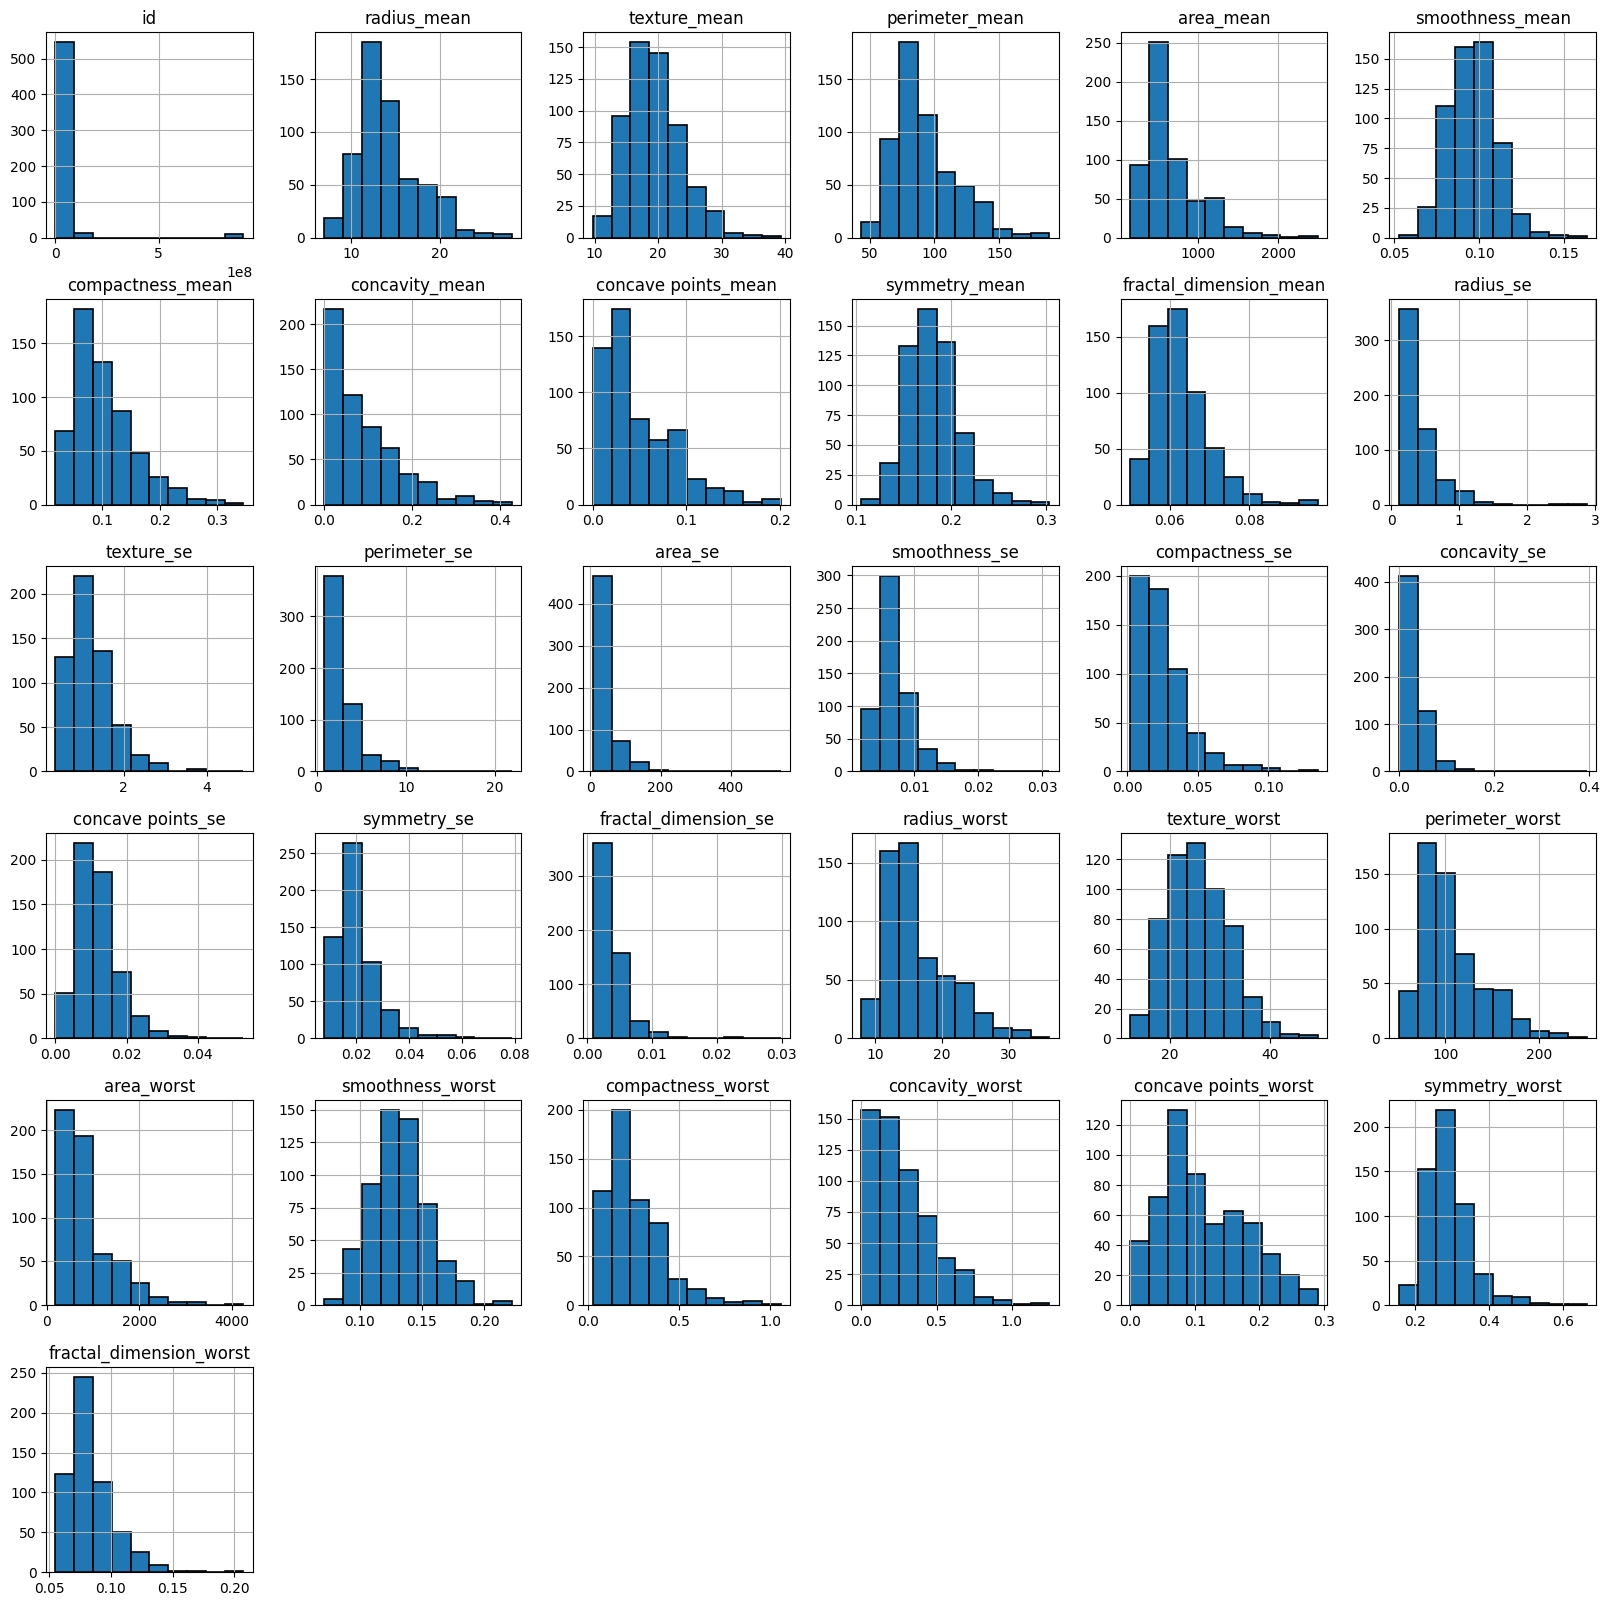

In [11]:
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20))
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.show()


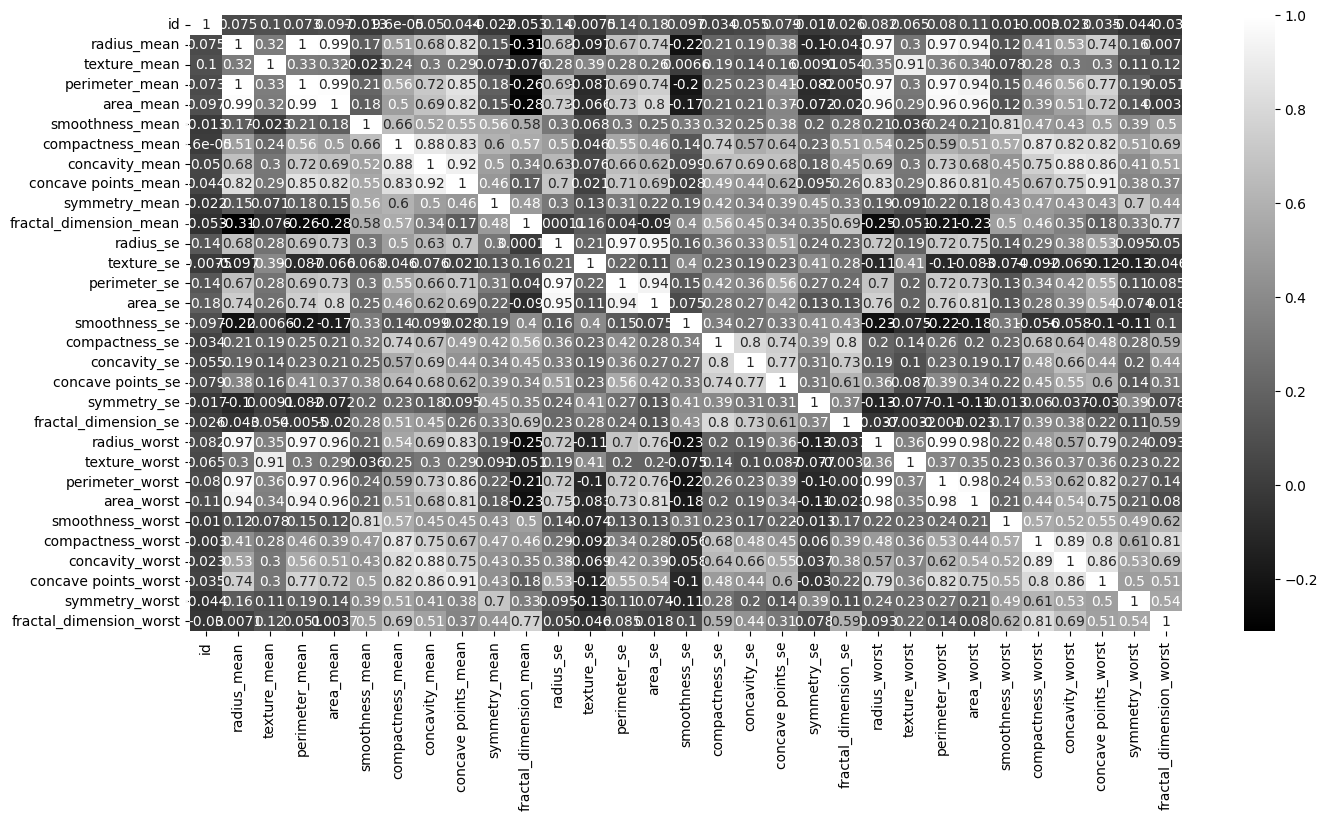

In [13]:
plt.figure(figsize=(16,8))
sns.heatmap(data.drop("diagnosis", axis=1).corr(),annot=True,cmap='gray')
plt.show()

No tutaj troche ciezko cos wyczytac, pewnie mozna by sie pobawic zeby jakos te dane podzielic. Ale lecimy dalej jak bedzie extra czas to mozna sie pobawic


Dzielimy sobie dane 80% uczenie / 20% testowanie

In [30]:
train, test = sklearn.model_selection.train_test_split(data, test_size=0.2)

# train_X = train.drop(["id"], axis=1)
# train_Y = train["id"]

# test_X = test.drop(["id"], axis=1)
# test_Y = test["id"]


No dobra to lecimy z modelami w tensorflow i zobaczymy jak to dziala

Najpierw musimy przerobic dane z pandas na zbiory z uzyciem tensor flow

In [31]:
train.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
429,B,12.72,17.67,80.98,501.3,0.07896,0.04522,0.01402,0.01835,0.1459,...,13.82,20.96,88.87,586.8,0.1068,0.09605,0.03469,0.03612,0.2165,0.06025
317,M,18.22,18.87,118.70,1027.0,0.09746,0.11170,0.11300,0.07950,0.1807,...,21.84,25.00,140.90,1485.0,0.1434,0.27630,0.38530,0.17760,0.2812,0.08198
44,M,13.17,21.81,85.42,531.5,0.09714,0.10470,0.08259,0.05252,0.1746,...,16.23,29.89,105.50,740.7,0.1503,0.39040,0.37280,0.16070,0.3693,0.09618


In [32]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train, label="diagnosis")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test, label="diagnosis")






I0000 00:00:1724364960.004950    5359 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-08-23 00:16:00.008432: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


No dobra to tworzymy pierwszy model

In [41]:
model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.CLASSIFICATION)
model.compile(metrics=["accuracy"])
model.fit(train_ds)


Use /tmp/tmp7l7799sv as temporary training directory
Reading training dataset...


Training dataset read in 0:00:00.422277. Found 455 examples.
Training model...
Model trained in 0:00:00.074086
Compiling model...


I0000 00:00:1724365402.216018    5359 kernel.cc:774] Start Yggdrasil model training
I0000 00:00:1724365402.216126    5359 kernel.cc:775] Collect training examples
I0000 00:00:1724365402.216140    5359 kernel.cc:787] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1724365402.216366    5359 kernel.cc:394] Number of batches: 1
I0000 00:00:1724365402.216394    5359 kernel.cc:395] Number of examples: 455
I0000 00:00:1724365402.216534    5359 kernel.cc:794] Training dataset:
Number of records: 455
Number of columns: 31

Number of columns by type:
	NUMERICAL: 30 (96.7742%)
	CATEGORICAL: 1 (3.22581%)

Columns:

NUMERICAL: 30 (96.7742%)
	1: "area_mean" NUMERICAL me

Model compiled.


No dobra model nauczony to zobaczymy jakie sa jego wyniki

In [38]:
evaluation = model.evaluate(test_ds, return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

1/1 [==============================] - 0s 187ms/step - loss: 0.0000e+00 - accuracy: 0.9649
loss: 0.0000
accuracy: 0.9649


In [40]:
model.summary()

Model: "random_forest_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (30):
	area_mean
	area_se
	area_worst
	compactness_mean
	compactness_se
	compactness_worst
	concave_points_mean
	concave_points_se
	concave_points_worst
	concavity_mean
	concavity_se
	concavity_worst
	fractal_dimension_mean
	fractal_dimension_se
	fractal_dimension_worst
	perimeter_mean
	perimeter_se
	perimeter_worst
	radius_mean
	radius_se
	radius_worst
	smoothness_mean
	smoothness_se
	smoothness_worst
	symmetry_mean
	symmetry_se
	symmetry_worst
	texture_mean
	texture_se
	texture_worst

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.         "perimeter_worst"  0.273737 #############